In [8]:
import numpy as np
import pandas as pd
import plotnine as pn
from rdot import ba
from rdot import distortions

In [9]:
# Medin and Schaffer deterministic category labels
py_x = np.array(
    [
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
    ]
)
py_x /= py_x.sum(axis=1)[:, None]
# get joint by multiplying by p(x)
px = np.full(py_x.shape[0], 1/py_x.shape[0])
pxy = py_x * px[:, None]

fx = np.array(
    [
        # A
        [0.,0.,0.,1.],
        [0.,1.,0.,1.],
        [0.,1.,0.,0.],
        [0.,0.,1.,0.],
        [1.,0.,0.,0.],
        # B
        [0.,0.,1.,1.],
        [1.,0.,0.,1.],
        [1.,1.,1.,0.],
        [1.,1.,1.,1.],
    ]
)

betas = np.logspace(-2, 5, num=300)
alphas = np.linspace(0,1,30) # 0 <= alpha <= 1. When alpha=1, we have vanilla IB

weights = np.ones(fx.shape[1])

In [10]:
results = ba.IBMSEOptimizer(
        pxy, 
        fx,
        betas,
        alphas,
        num_restarts=1,
        weights=weights,
        ensure_monotonicity=False,
).get_results()

100%|██████████| 300/300 [00:00<00:00, 1848.66it/s]


In [11]:
rd_values = [(result.rate, result.distortion, result.accuracy, result.beta, result.alpha) for result in results if result is not None]
data = pd.DataFrame(
    rd_values, 
    columns=[
        "rate", 
        "distortion",
        "accuracy",
        "beta",
        "alpha",
    ]
)

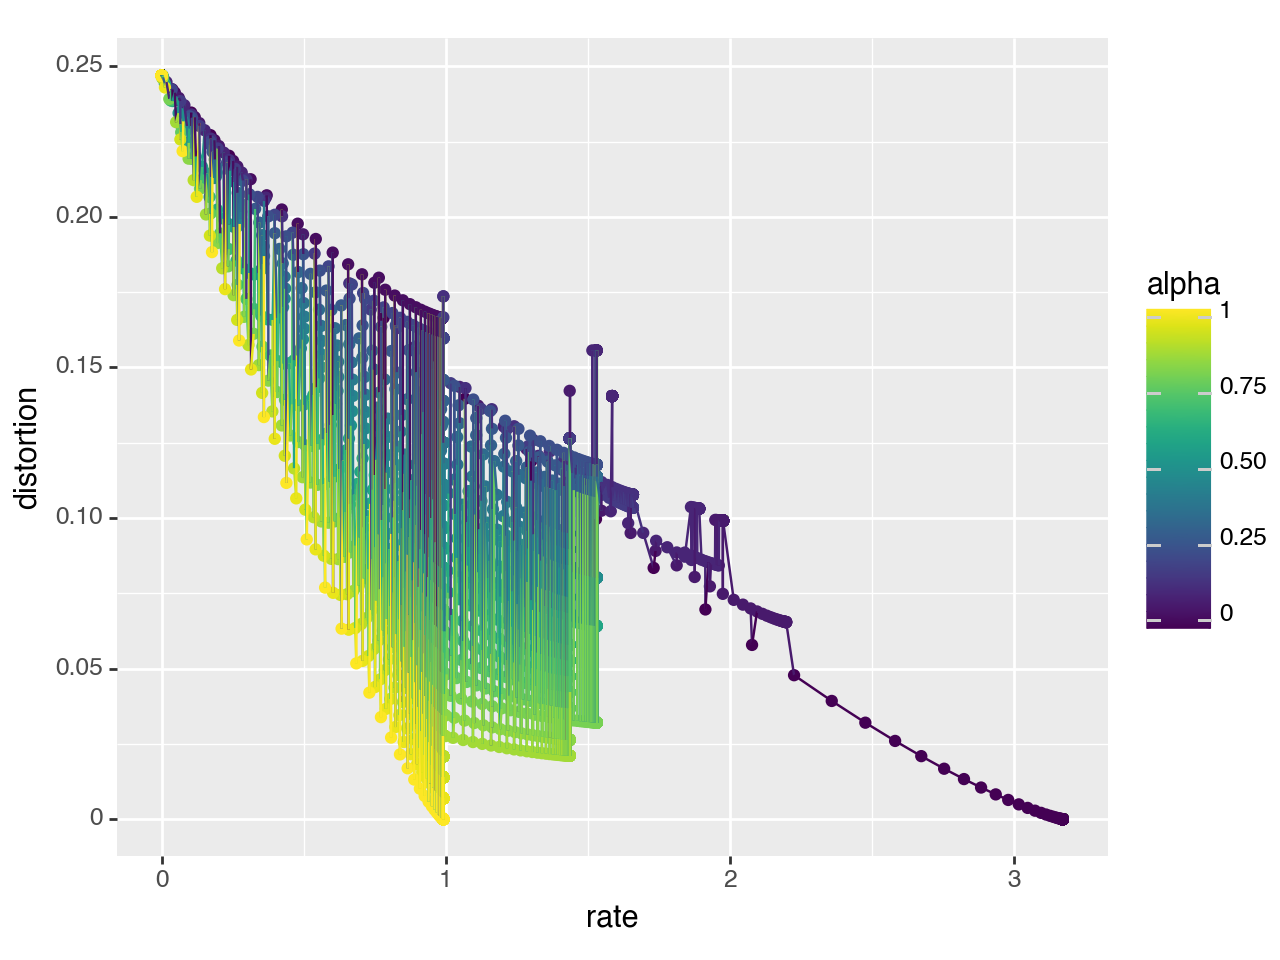

<Figure Size: (640 x 480)>

In [36]:
(
    pn.ggplot(
        # data[data["alpha"] == 0.],
        data,
        pn.aes(
            x="rate", 
            y="distortion", 
            # y="accuracy",
            color="alpha"
            # color="beta",
        )
    )
    + pn.geom_point()
    + pn.geom_line()
)

In [41]:
results = ba.IBMSEOptimizer(
        pxy, 
        fx,
        betas,
        np.array([0.]),
        num_restarts=1,
        weights=weights,
        ensure_monotonicity=False,
).get_results()
results[-1]

100%|██████████| 300/300 [00:00<00:00, 1098.67it/s]


IBMSEResult(qxhat_x=array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]]), fxhat=array([[1.e-16, 1.e-16, 1.e-16, 1.e+00],
       [1.e-16, 1.e+00, 1.e-16, 1.e+00],
       [1.e-16, 1.e+00, 1.e-16, 1.e-16],
       [1.e-16, 1.e-16, 1.e+00, 1.e-16],
       [1.e+00, 1.e-16, 1.e-16, 1.e-16],
       [1.e-16, 1.e-16, 1.e+00, 1.e+00],
       [1.e+00, 1.e-16, 1.e-16, 1.e+00],
       [1.e+00, 1.e+00, 1.e+00, 1.e-16],
       [1.e+00, 1.e+00, 1.e+00, 1.e+00]]), rate=3.169925001442315, distortion=0.0, accuracy=0.991076059838222, beta=100000.0, alpha=0.0)

In [44]:
# TODO: add test cases that test that the deterministic case has this rate. 
# Though it makes sense that you can achieve 0 distortion for lower than max rate for deterministic pxy, because you don't need a deterministic encoder to achieve deterministic 0 distortion.
# But in the vanilla RD problem, we do
np.log2(len(px))

3.169925001442312